# Text Vectorization Using Traditional Methods

- There are many ways to vectorize a text into numeric representations.
- In traditional linguistic studies, linguists may manually annotate a text based on self-defined linguistic properties. These annotations can be easily converted into numeric values, thus in turn, vectorizing the text.
- In statistical language processing, it is important to reduce the effort of manual annotation and come up with ways to automatically vectorize a text.
- In this tutorial, we look at the traditional bag-of-words method for text vectorization.


## Import necessary dependencies and settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200
%matplotlib inline

## Sample corpus of text documents

In [4]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


## Simple text pre-processing

In [5]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [6]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

## Bag of Words Model

- Bag-of-words model is the simplest way to vectorize texts into numeric representations.
- In short, it is a method to represent a text using its word frequency list.
- The sequential order of words in the text is therefore naively ignored.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<8x20 sparse matrix of type '<class 'numpy.int64'>'
	with 42 stored elements in Compressed Sparse Row format>

In [8]:
# view non-zero feature positions in the sparse matrix
print(cv_matrix)

  (0, 17)	1
  (0, 3)	1
  (0, 2)	1
  (1, 17)	1
  (1, 3)	1
  (1, 2)	1
  (1, 14)	1
  (2, 15)	1
  (2, 5)	1
  (2, 8)	1
  (2, 11)	1
  (2, 13)	1
  (2, 6)	1
  (3, 12)	1
  (3, 4)	1
  (3, 16)	1
  (3, 10)	1
  (3, 0)	1
  (3, 7)	1
  (3, 18)	1
  (3, 1)	1
  (4, 14)	1
  (4, 16)	1
  (4, 10)	1
  (4, 0)	1
  (4, 7)	1
  (4, 9)	1
  (5, 3)	1
  (5, 15)	1
  (5, 5)	1
  (5, 8)	1
  (5, 13)	1
  (5, 6)	1
  (6, 17)	2
  (6, 3)	1
  (6, 2)	1
  (6, 19)	1
  (7, 15)	1
  (7, 5)	1
  (7, 8)	1
  (7, 13)	1
  (7, 6)	1


In [9]:
# view dense representation 
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

In [10]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


## Bag of N-Grams Model

In [12]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF Model

- TF-IDF model is an extension of the bag-of-words model.
- It further considers the marginal frequencies of the words as well as the document sizes.

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer

tt = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True)
tt_matrix = tt.fit_transform(cv_matrix)

tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2',
                     use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


## Intuition of TF-IDF

In [15]:
# get unique words as feature names
unique_words = list(set([word for doc in [doc.split() for doc in norm_corpus] 
                         for word in doc]))
def_feature_dict = {w: 0 for w in unique_words}
print('Feature Names:', unique_words)
print('Default Feature Dict:', def_feature_dict)

Feature Names: ['love', 'dog', 'eggs', 'beans', 'toast', 'lazy', 'quick', 'sky', 'kings', 'bacon', 'green', 'blue', 'sausages', 'brown', 'ham', 'jumps', 'beautiful', 'breakfast', 'today', 'fox']
Default Feature Dict: {'love': 0, 'dog': 0, 'eggs': 0, 'beans': 0, 'toast': 0, 'lazy': 0, 'quick': 0, 'sky': 0, 'kings': 0, 'bacon': 0, 'green': 0, 'blue': 0, 'sausages': 0, 'brown': 0, 'ham': 0, 'jumps': 0, 'beautiful': 0, 'breakfast': 0, 'today': 0, 'fox': 0}


In [16]:
from collections import Counter
# build bag of words features for each document - term frequencies
bow_features = []
for doc in norm_corpus:
    bow_feature_doc = Counter(doc.split())
    all_features = Counter(def_feature_dict)
    bow_feature_doc.update(all_features)
    bow_features.append(bow_feature_doc)

bow_features = pd.DataFrame(bow_features)
bow_features

,sky,blue,beautiful,love,dog,eggs,beans,toast,lazy,quick,kings,bacon,green,sausages,brown,ham,jumps,breakfast,today,fox
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1
3,0,0,0,0,0,1,1,1,0,0,1,1,0,1,0,1,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0
5,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1
6,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1


In [17]:
import scipy.sparse as sp
feature_names = list(bow_features.columns)

# build the document frequency matrix
df = np.diff(sp.csc_matrix(bow_features, copy=True).indptr)
df = 1 + df # adding 1 to smoothen idf later

# show smoothened document frequencies
pd.DataFrame([df], columns=feature_names)

,sky,blue,beautiful,love,dog,eggs,beans,toast,lazy,quick,kings,bacon,green,sausages,brown,ham,jumps,breakfast,today,fox
0,4,5,4,3,4,3,2,2,4,4,2,3,2,3,4,3,2,2,2,4


In [18]:
# compute inverse document frequencies
total_docs = 1 + len(norm_corpus)
idf = 1.0 + np.log(float(total_docs) / df)

# show smoothened idfs
pd.DataFrame([np.round(idf, 2)], columns=feature_names)

,sky,blue,beautiful,love,dog,eggs,beans,toast,lazy,quick,kings,bacon,green,sausages,brown,ham,jumps,breakfast,today,fox
0,1.81,1.59,1.81,2.1,1.81,2.1,2.5,2.5,1.81,1.81,2.5,2.1,2.5,2.1,1.81,2.1,2.5,2.5,2.5,1.81


In [19]:
# compute idf diagonal matrix  
total_features = bow_features.shape[1]
idf_diag = sp.spdiags(idf, diags=0, m=total_features, n=total_features)
idf_dense = idf_diag.todense()

# print the idf diagonal matrix
pd.DataFrame(np.round(idf_dense, 2))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.81,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
1,0.00,1.59,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
2,0.00,0.00,1.81,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
3,0.00,0.00,0.00,2.1,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
4,0.00,0.00,0.00,0.0,1.81,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
5,0.00,0.00,0.00,0.0,0.00,2.1,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
6,0.00,0.00,0.00,0.0,0.00,0.0,2.5,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
7,0.00,0.00,0.00,0.0,0.00,0.0,0.0,2.5,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
8,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,1.81,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
9,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,1.81,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00


In [20]:
# compute tfidf feature matrix
tf = np.array(bow_features, dtype='float64')
tfidf = tf * idf
# view raw tfidf feature matrix
pd.DataFrame(np.round(tfidf, 2), columns=feature_names)

,sky,blue,beautiful,love,dog,eggs,beans,toast,lazy,quick,kings,bacon,green,sausages,brown,ham,jumps,breakfast,today,fox
0,1.81,1.59,1.81,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
1,1.81,1.59,1.81,2.1,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
2,0.00,0.00,0.00,0.0,1.81,0.0,0.0,0.0,1.81,1.81,0.0,0.0,0.0,0.0,1.81,0.0,2.5,0.0,0.0,1.81
3,0.00,0.00,0.00,0.0,0.00,2.1,2.5,2.5,0.00,0.00,2.5,2.1,0.0,2.1,0.00,2.1,0.0,2.5,0.0,0.00
4,0.00,0.00,0.00,2.1,0.00,2.1,0.0,0.0,0.00,0.00,0.0,2.1,2.5,2.1,0.00,2.1,0.0,0.0,0.0,0.00
5,0.00,1.59,0.00,0.0,1.81,0.0,0.0,0.0,1.81,1.81,0.0,0.0,0.0,0.0,1.81,0.0,0.0,0.0,0.0,1.81
6,3.62,1.59,1.81,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2.5,0.00
7,0.00,0.00,0.00,0.0,1.81,0.0,0.0,0.0,1.81,1.81,0.0,0.0,0.0,0.0,1.81,0.0,0.0,0.0,0.0,1.81


In [21]:
from numpy.linalg import norm
# compute L2 norms 
norms = norm(tfidf, axis=1)

# print norms for each document
print (np.round(norms, 3))

[3.013 3.672 4.761 6.534 5.319 4.35  5.019 4.049]


In [22]:
# compute normalized tfidf
norm_tfidf = tfidf / norms[:, None]

# show final tfidf feature matrix
pd.DataFrame(np.round(norm_tfidf, 2), columns=feature_names)

,sky,blue,beautiful,love,dog,eggs,beans,toast,lazy,quick,kings,bacon,green,sausages,brown,ham,jumps,breakfast,today,fox
0,0.60,0.53,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
1,0.49,0.43,0.49,0.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2,0.00,0.00,0.00,0.00,0.38,0.00,0.00,0.00,0.38,0.38,0.00,0.00,0.00,0.00,0.38,0.00,0.53,0.00,0.0,0.38
3,0.00,0.00,0.00,0.00,0.00,0.32,0.38,0.38,0.00,0.00,0.38,0.32,0.00,0.32,0.00,0.32,0.00,0.38,0.0,0.00
4,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.00,0.00,0.00,0.39,0.47,0.39,0.00,0.39,0.00,0.00,0.0,0.00
5,0.00,0.37,0.00,0.00,0.42,0.00,0.00,0.00,0.42,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.00,0.00,0.0,0.42
6,0.72,0.32,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.5,0.00
7,0.00,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.45,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.0,0.45


In [23]:
new_doc = 'the sky is green today'

pd.DataFrame(np.round(tv.transform([new_doc]).toarray(), 2), 
             columns=tv.get_feature_names())

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.46,0.0,0.63


## Document Similarity

- Text vectorization allows us to perform computation of document similarity

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


## Clustering documents using similarity features

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2,7,0.253098,2
1,0,6,0.308539,2
2,5,8,0.386952,3
3,1,9,0.489845,3
4,3,4,0.732945,2
5,11,12,2.69565,5
6,10,13,3.45108,8


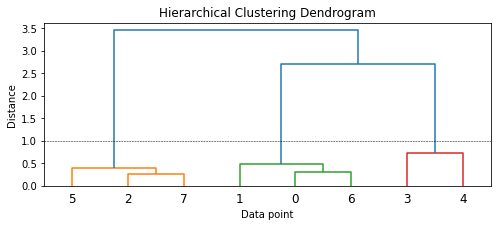

In [26]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [27]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,3
4,"I love green eggs, ham, sausages and bacon!",food,3
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


## References

- Based on Sarkar (2020), Ch 4 Feature Engineering and Text Representation